# Импортирование библиотек и их модулей

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble, model_selection, metrics

In [38]:
import warnings
warnings.filterwarnings('ignore')

# Загрузка и предобработка данных

In [39]:
bioresponce = pd.read_csv('train(random_forest).csv', header=0, sep=',')

In [40]:
bioresponce.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [41]:
bioresponce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


In [42]:
bioresponce.dtypes

Activity      int64
D1          float64
D2          float64
D3          float64
D4          float64
             ...   
D1772         int64
D1773         int64
D1774         int64
D1775         int64
D1776         int64
Length: 1777, dtype: object

In [43]:
bioresponce.columns

Index(['Activity', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       ...
       'D1767', 'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774',
       'D1775', 'D1776'],
      dtype='object', length=1777)

In [44]:
bioresponce.shape

(3751, 1777)

In [45]:
print('Доля объектов с меткой +1: {:.2f}'.format(len(bioresponce[bioresponce['Activity']==1]) / len(bioresponce['Activity'])))
print('Доля объектов со меткой 0: {:.2f}'.format(len(bioresponce[bioresponce['Activity']==0]) / len(bioresponce['Activity'])))

Доля объектов с меткой +1: 0.54
Доля объектов со меткой 0: 0.46


## Признаки:

In [46]:
X = bioresponce.drop(['Activity'], axis = 1)
X.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0,0,0,0,0,0,0,0,0,0


## Метки:

In [47]:
Y = bioresponce[['Activity']]
Y.head()

,Activity
0,1
1,1
2,1
3,1
4,0


# Возможные параметры RandomForestClassifier - классификатора

In [48]:
forest = ensemble.RandomForestClassifier()

In [49]:
forest.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

# Анализ на лучшее разбиение данных

## Глубина = 3

In [50]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 3, random_state = 1)

In [51]:
%%time
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier, X, Y, 
                                                                       train_sizes=np.arange(0.1,1, 0.1), 
                                                                       cv=5, scoring='accuracy')

Wall time: 9.65 s


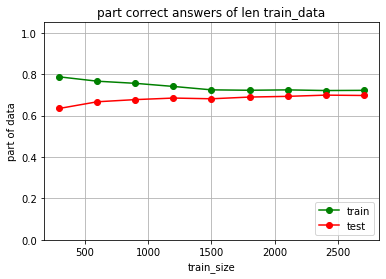

In [52]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
plt.title('part correct answers of len train_data')
plt.ylabel('part of data')
plt.xlabel('train_size')
plt.ylim((0.0, 1.05))
plt.legend(loc='lower right')
plt.show()

## Глубина = 10

In [53]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 1)

In [54]:
%%time
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier, X, Y, 
                                                                       train_sizes=np.arange(0.1,1, 0.1), 
                                                                       cv=5, scoring='accuracy')

Wall time: 18.9 s


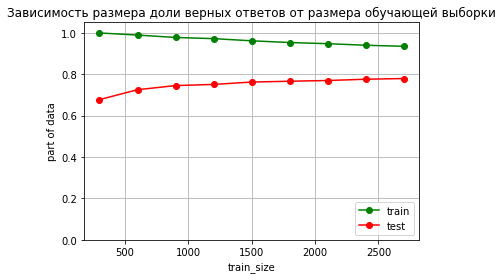

In [55]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
plt.title('Зависимость размера доли верных ответов от размера обучающей выборки')
plt.ylabel('part of data')
plt.xlabel('train_size')
plt.ylim((0.0, 1.05))
plt.legend(loc='lower right')
plt.show()

# Разбиение данных на обучающую и тестовую выборки

In [56]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, train_size = 0.8, random_state = 1) 

# Поиск оптимального кол-ва деревьев на итерации леса

In [57]:
number_trees = np.linspace(1, 100, 20)
number_trees

array([  1.        ,   6.21052632,  11.42105263,  16.63157895,
        21.84210526,  27.05263158,  32.26315789,  37.47368421,
        42.68421053,  47.89473684,  53.10526316,  58.31578947,
        63.52631579,  68.73684211,  73.94736842,  79.15789474,
        84.36842105,  89.57894737,  94.78947368, 100.        ])

In [58]:
%%time
accuracy = []
for number_tree in number_trees:
    forest = ensemble.RandomForestClassifier(n_estimators = int(number_tree), min_samples_split = 5, random_state = 1)
    score = model_selection.cross_val_score(forest, X, Y, scoring = 'accuracy')
    accuracy.append(score)

Wall time: 1min 42s


In [59]:
accuracy = np.asmatrix(accuracy)

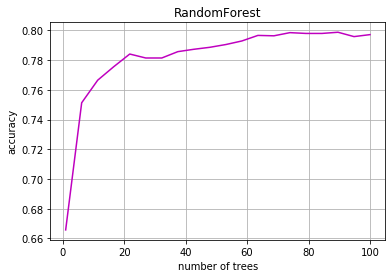

In [60]:
plt.plot(number_trees, accuracy.mean(axis = 1), label = 'RandomForest', color = 'm')
plt.grid(True)
plt.title('RandomForest')
plt.xlabel('number of trees')
plt.ylabel('accuracy')
plt.show()

# Подбор лучших параметров для обучения

In [61]:
classification = ensemble.RandomForestClassifier(random_state = 1, n_estimators = 5)
classification.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [62]:
parameters_grid = {
    'min_samples_split' : [2, 3, 4, 5, 6],
    'max_depth' : np.linspace(30, 200, 50, dtype = 'int64'),
    'bootstrap' : ['deviance', 'exponential'],
    'max_features' : np.linspace(50, 100, 50, dtype = 'int64')
}

In [63]:
cv = model_selection.StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

In [64]:
grid_cv = model_selection.RandomizedSearchCV(classification, parameters_grid, scoring = 'accuracy', cv = cv, n_iter = 50)

In [65]:
%%time
grid_cv.fit(X_train, y_train)

Wall time: 2min 5s


RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_...
       165, 168, 172, 175, 179, 182, 186, 189, 193, 196, 200]

## Параметры лучшей модели

In [66]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.7508333333333332
{'min_samples_split': 6, 'max_features': 97, 'max_depth': 147, 'bootstrap': 'deviance'}


In [67]:
print(grid_cv.best_estimator_)

RandomForestClassifier(bootstrap='deviance', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=147, max_features=97,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


# Лучшая модель

In [68]:
forest_best = ensemble.RandomForestClassifier(bootstrap='deviance', class_weight=None,
                       criterion='gini', max_depth=158, max_features=69,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

# Обучение по лучшей модели

In [69]:
forest_best.fit(X_train, y_train)
predictions = forest_best.predict(X_test)

# Метрики:

## Jaccard - score

In [70]:
print('{: .2f}'.format(metrics.jaccard_score(y_test, predictions)))

 0.69


## Confusion-matrix

In [71]:
matrix = metrics.confusion_matrix(y_test, predictions)
print(matrix)

[[270  72]
 [ 77 332]]


## Classification-report

In [72]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       342
           1       0.82      0.81      0.82       409

    accuracy                           0.80       751
   macro avg       0.80      0.80      0.80       751
weighted avg       0.80      0.80      0.80       751

